# Исследование закономерностей, более всего влияющих на успешность игр

В данном проекте представлены данных из открытых источниках о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до конца 2016 года. Определить факторы, которые больше всего повлияли на успешность игры. 


Описание файла для анализа:<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<a id="0"></a>
## Содержание
1. [Общая информация](#1)
2. [Подготовка данных](#2)
3. [Исследовательский анализ данных](#3)<br>
3.1. [Количество игр в разные годы](#3a)<br>
3.2. [Продажи по платформам в разные годы](#3.2)<br>
3.3. [Выбор актуального периода для анализа](#3.3)<br>
3.4. [Глобальные продажи по всем платформам в актульный период](#3.4)<br>
3.5. [Влияние отзывов пользователей и критиков на продажи игр для PS4](#3.5)<br>
3.6. [Распределение игр по жанрам](#3.6)
4. [Портрет пользователя каждого региона](#4)<br>
4.1. [Самые популярные платформы (топ-5) для различных регионов](#4.1)<br>
4.2. [Самые популярные жанры (топ-5) для различных регионов](#4.2)<br>
4.3. [Влияние рейтинга ESRB на продажи в отдельном регионе](#4.3)
5. [Проверка гипотез](#5)<br>
5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1)<br>
5.2 [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2)<br>
6. [Общий вывод](#6)
        


In [1]:
# Загружаем необходимые расширения
# Устанавливаем любимый темплейт для графиков :)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import datetime


plt.style.use('ggplot')
sns.set_palette('Paired')
starttime=datetime.datetime.now()

<a id="1"></a>
## Шаг 1. Общая информация

##### На данном шаге открываем файл и смотрим общую информацию о данных.  

In [2]:
data=pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные представлены в виде таблицы, в которой 11 столбцов (характеристик) и 16715 строчек (наблюдений). В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating имеются пропущенные значения, которые будут анализироваться на следующем шаге. На данном этапе можно предположить, что пропуски появились случайным образом в результате парсинга. 

[К содержанию](#0)

<a id="2"></a>
## Шаг 2. Подготовка данных


##### На данном шаге происходит общая подготовка данных, включающая в себея приведение названия столбцов к нижнему регистру, преобразование данных в нужные типы, обработка пропусков там, где это возможно. 

In [4]:
# Названия столбцов привели к нижнему регистру для удобства к обращению к ним во время анализа. 
data.columns=data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Тип данных в year_of_release переведем из вещественного в целочисленный, а User_Score со строчнго на вещественный. <br>
Тем не менее, сделать это довольно сложно, потому что в обоих столбцах имеются пропуски, причем в столбце user_score доля превышает 40%. 

In [5]:
def gaps(data):
    a=[]
    for i in data.columns:
        m=data[i].isna().sum()/len(data)
        if m>0:
            a.append('Доля пропущенных значений в '+i+': {:.2%}'.format(m))
            
    return 'Количество столбцов с пропущенными значениями: {}'.format(len(a)), a

In [6]:
gaps(data)

('Количество столбцов с пропущенными значениями: 6',
 ['Доля пропущенных значений в name: 0.01%',
  'Доля пропущенных значений в year_of_release: 1.61%',
  'Доля пропущенных значений в genre: 0.01%',
  'Доля пропущенных значений в critic_score: 51.32%',
  'Доля пропущенных значений в user_score: 40.09%',
  'Доля пропущенных значений в rating: 40.48%'])

Например, год можно извлечь из названия игры. Но это даст нам информацию только для 17 наблюдений. 

In [7]:
data[data.year_of_release.isna()].name.str.extract('(\d{4})')[0].value_counts()

2003    4
2004    2
2008    2
2005    2
2006    2
2011    1
2013    1
2009    1
2002    1
2007    1
Name: 0, dtype: int64

In [8]:
for i in data[data.year_of_release.isna()].name.str.extract('(\d{4})').dropna().index:
    data.at[i,'year_of_release']=data[data.year_of_release.isna()].name.str.extract('(\d{4})').dropna().at[i,0]

В остальных случаях восстановление информации по году выпуска затруднительно. Поэтому предлагаю убрать данные строки из нашего сета (всего 1.5%).

In [9]:
data=data[data.year_of_release.isna()==False]
data.year_of_release=data.year_of_release.astype('int')
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проанализируем отдельно пропущенные значения в user_score в поисках каких-либо взаимосвязей.<br>
Можно увидеть, что на 14 платформах полностью отсутвуют user_score, еще на 8 этот показатель больше 50%. 

In [10]:
i='platform'
pd.concat([data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts().to_frame('Количество tbd и nan'),
           (data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts()/data[i].value_counts()).dropna().to_frame('Доля tbd и nan')],
          axis=1).sort_values(by=['Доля tbd и nan','Количество tbd и nan'],ascending=False)


,Количество tbd и nan,Доля tbd и nan
N64,316,1.000000
SNES,239,1.000000
SAT,173,1.000000
2600,116,1.000000
NES,98,1.000000
GB,97,1.000000
GEN,29,1.000000
NG,12,1.000000
SCD,6,1.000000
WS,6,1.000000


Если смотреть по жанрам, то значительный процент пропусков (более 50%) можно увидеть везде, кроме Racing, Action, Shooter, где процент пропусков в среднем на уровне 40%. 

In [11]:
i='genre'
pd.concat([data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts().to_frame('Количество tbd и nan'),
           (data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts()/data[i].value_counts()).dropna().to_frame('Доля tbd и nan')],
          axis=1).sort_values(by=['Доля tbd и nan','Количество tbd и nan'],ascending=False)


,Количество tbd и nan,Доля tbd и nan
Puzzle,444,0.780316
Adventure,995,0.769528
Misc,1292,0.750726
Simulation,518,0.604434
Strategy,368,0.546805
Sports,1230,0.530630
Fighting,443,0.528640
Platform,454,0.517084
Role-Playing,744,0.502363
Racing,598,0.486574


Можно увидеть такую взаимосвязь, что с начала 2000 года роль доля пропущенных значений падает. Поэтому отсутствующие значения по user_score можно объяснить, например, неразвитостью инфраструктуры оценивания компьютерных игр до начала 21 века.

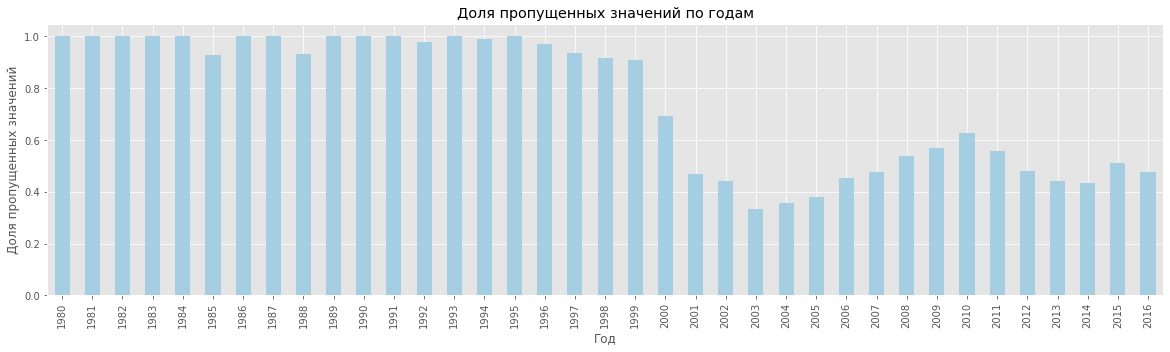

In [12]:
i='year_of_release'
pd.concat([data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts().to_frame('Количество tbd и nan'),
           (data[(data.user_score=='tbd')|(data.user_score.isna())][i].value_counts()/data[i].value_counts()).dropna().to_frame('Доля tbd и nan')],
          axis=1)['Доля tbd и nan'].plot(kind='bar',figsize=(20,5))
plt.title('Доля пропущенных значений по годам')
plt.xlabel('Год')
plt.ylabel('Доля пропущенных значений')
plt.show()

И в основном пропущенные значения встречаются в играх, наиболее популярных в Японии. Так, в Японии доля пропущенных значений по продажам составляет 65%, в то время как в Северноей Америке и Европе этот показатель 35% и 30% соответственно. 

In [13]:
((data[(data.user_score=='tbd')|(data.user_score.isna())][['na_sales','eu_sales','jp_sales']].sum())/
(data[['na_sales','eu_sales','jp_sales']].sum()))

na_sales    0.351480
eu_sales    0.296729
jp_sales    0.653661
dtype: float64

Поэтому в данном случае трудно заменить пропущенные значения таким образом, чтобы получить какой-либо верный результат. Так, например, для непопулярной игры мы можем завысить рейтинг, и тогда результаты нашего анализа получат сдвиг. Выше я показал, что существует несколько измерений, которые могли бы повлиять на причину пропущенных значений, поэтому предлагаю на данном этапе заменить все пропущенные значения (в том числе и tbd) на числовое значение не существующего рейтинга (например, 11) - это для простоты конвертирования дальше нашего столбца в нужный тип данных. 

In [14]:
data.user_score=data.user_score.replace('tbd',11).fillna(11).astype('float')

Замена в данных и других рейтингов (critic_score, rating) также не представляется возможным, поэтому я их оставлю без изменения (их тип данных определен в нужном формате, поэтому заменять пропуски на какие-либо значения не считаю нужным).

2 игры не имеют названия. Думаю, это восстановить невозможно, поэтому предлагаю 2 строчки удалить. 

In [15]:
data=data[data.name.isna()==False]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,11.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,11.0,NaN


Проверим наш сет на наличие дубликатов. 

In [16]:
data.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец  

In [17]:
data['all_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       7995 non-null float64
user_score         16461 non-null float64
rating             9779 non-null object
all_sales          16461 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод по шагу 2
Таким образом, в этом шаге провели анализ пропусков, проверили сет на дубликаты, поменяли тип данных, создали новый столбец по продажам по всем регионам. К сожалению, большинство пропусков обработать не получилось, поскольку упущенную информацию нельзя никаким образом восстановить. Тем не менее, выявили несколько наиболее важных инсайтов: пропуски по оценке пользователей в основном приходятся на популярные игры в Японии, а также их доля значительна (более 80%) в периоде до 2000гг. Дальнейший анализ будет произведен на следующем шаге. 

[К содержанию](#0)

<a id="3"></a>
## Шаг 3. Исследовательский анализ данных

##### На данном шаге анализируем, сколько игр было создано в разные годы ([1](#3a)), смотрим продажи по платформам в разные годы ([2](#3.2)), выбираем наиболее актуальный период для анализа ([3](#3.3)), рассчитываем глобальные продажи по всем платфомам ([4](#3.4)), оцениваем влияние отзывов пользователей и критиков на продажи игр для PS4 ([5](#3.5)), распределяем игры по жанрам ([6](#3.6))

<a id="3a"></a>
**(1)** Проанализируем, сколько игр было создано в разные годы. 

In [19]:
def histogram(column,x,name):
    data[column].hist(bins=20)
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel('Частота')
    return plt.show()
def box(column,x,name):
    data[column].plot(kind='box',vert=0)
    plt.title(name)
    plt.xlabel(x)
    return plt.show()


Игры распределены неравномерно. Можно заметить, что игры до 1994 попадают в выбросы, потому что их количество очень маленькое. 

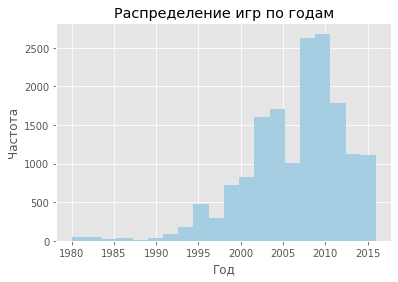

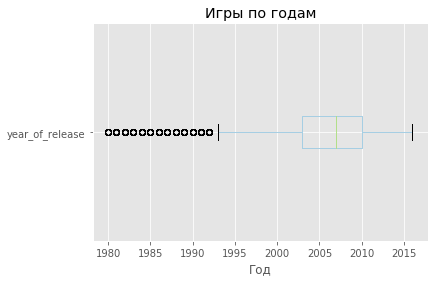

In [20]:
histogram('year_of_release','Год','Распределение игр по годам')
box('year_of_release','Год','Игры по годам')

Но если посмотртреть на медианные продажи игр, то можно увидеть, что в этот период продажи по годам были на пике. Также можно отметить, что с годами медианные продажи падают. Этому есть причины, связанные с тем, что с каждым годом все больше производится игр, с одной стороны, а с другой - все у большего количества людей появляются разные девайсы, из-за чего есть выбор в играх. Но в целом, можно отметить, что с 1995 года продажи стабилизировались. 

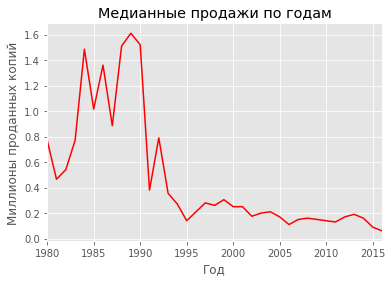

In [21]:
data.groupby(by='year_of_release')['all_sales'].median().plot(c='r')
plt.title('Медианные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Миллионы проданных копий')
plt.show()

Поэтому предлагаю убрать из анализа игры до 1995 года. Более того, для планирования на 2017 год это настолько далекий период для данного рынка, что анализ представляется бессмысленным (пользователи скорее всего в 1980-х использовали совсем другие девайсы, которые могли влиять на потребление игр).

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Здорово, что ты не просто привел результат, но и обосновал его. В этом и состоит суть работы аналитика. 

</div>

In [22]:
data=data[data.year_of_release>=1995]

<a id="3.2"></a>
**(2)** Посмотрим, как менялись продажи по платформам. Для этого построим сводную таблицу и выберем оттуда топовые платформы.

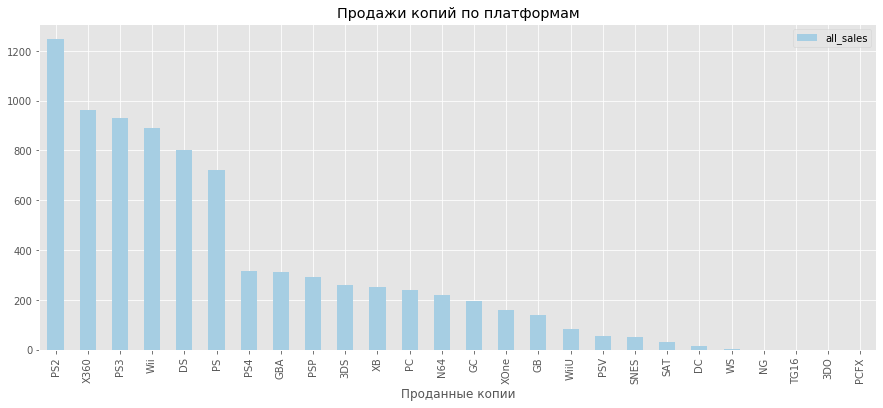

In [23]:
data.pivot_table('all_sales',
                 'platform',
                 aggfunc='sum').sort_values(by='all_sales',
                                            ascending=False).plot(kind='bar',figsize=(15,6))
plt.xlabel('Проданные копии')
plt.title('Продажи копий по платформам')
plt.show()

Среди платформ топовыми по продажам выделяются 6 платформ: PS2, X360, Wii, PS3, DS, PS (в большинстве из них это Sony PlayStation). Предлагаю добавить к топовым еще GBA, PS4, PSP. 

In [24]:
tops=['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PSP','PS4']

Платформы не живут постоянно, а развиваются и сменяют друг друга. В среднем продолжительность жизни одной платформы составляет 10 лет. При это на графиках ниже видно, что свои топовые значения они набирают только на 3-6 году жизни (исключение составляет Wii, который уже в первый год жизни оказался достаточно популярным). Далее популярность поступенно падает до нуля. 

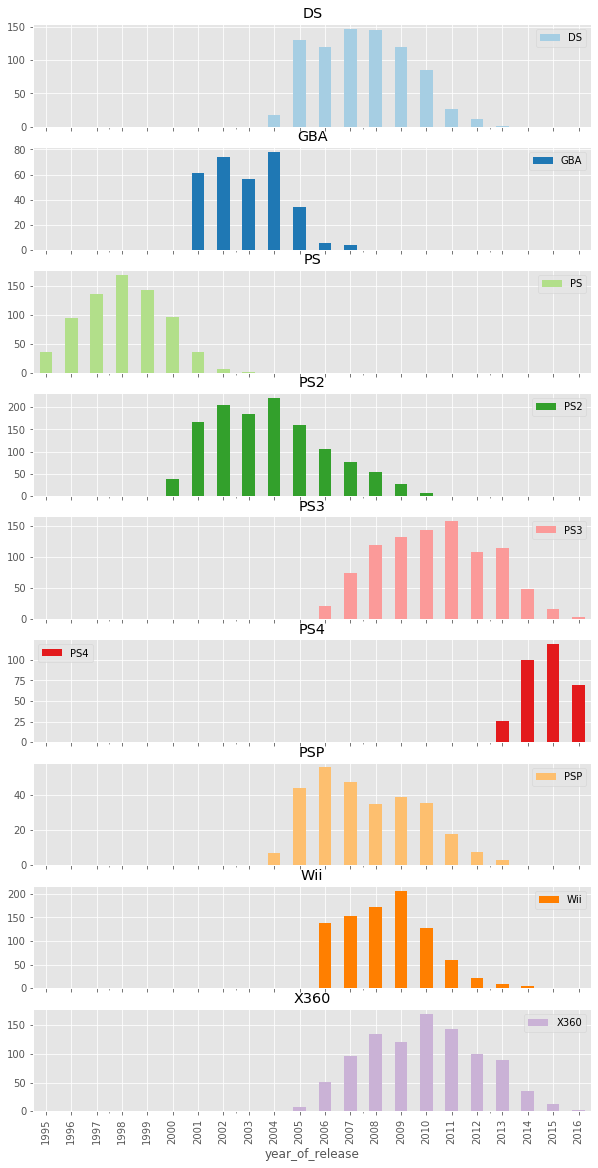

In [25]:
data.query('platform==@tops').pivot_table('all_sales',
                                         'year_of_release',
                                         'platform',
                                         'sum').plot(kind='bar',subplots=True,figsize=(10,20))
plt.show()

Построить такой же график для нетоповых платформ, чтобы определить, какие платформы актуальные в настоящий момент времени. 

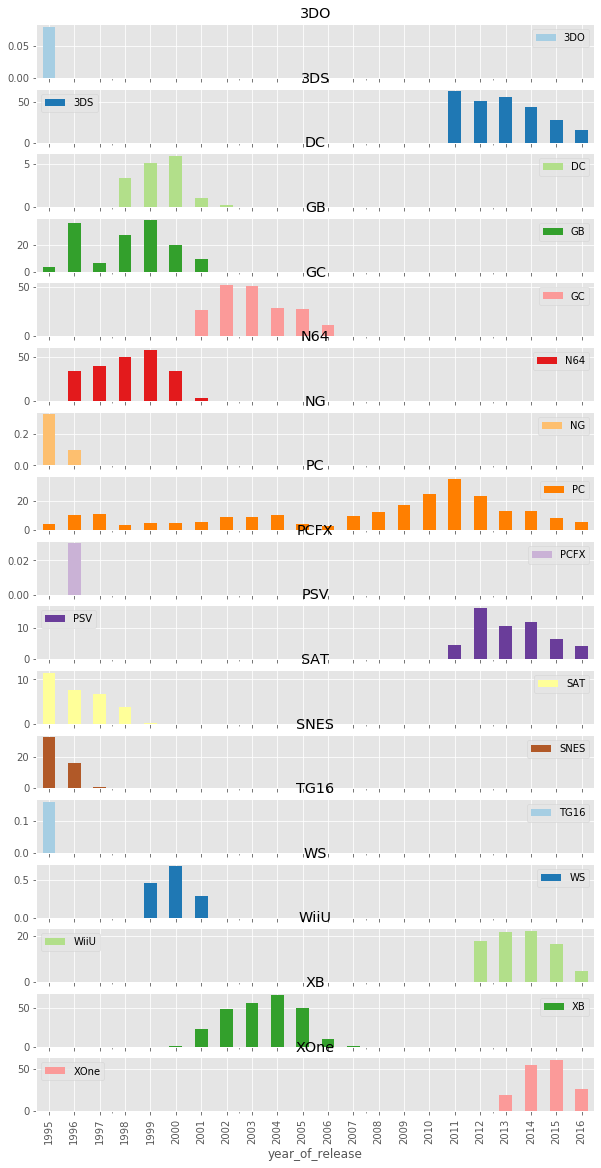

In [26]:
data.query('platform!=@tops').pivot_table('all_sales',
                                         'year_of_release',
                                         'platform',
                                         'sum').plot(kind='bar',subplots=True,figsize=(10,20))
plt.show()

Для анализа продолжительности жизни платформ уберем из списка платформы, которые выпускаются на данном периоде и не показывают затухание.<br> Среди топовых платформ это только одна платформа - PS4, для нетоповых - это XOne, WiiU, PSV, 3DS.<br>
Кстати, вожможно по той причине, что платформы, актуальные сейчас, не попали в топ-список, потому что еще не реализовали полностью свой потенциал (не прошли пик по популярности). <br>
Продолжительность жизни топовых и нетоповых платформ различается: нетоповые платформы живут в среднем на 5 лет меньше. 

In [27]:
tops=tops[:-1]
print('Средняя продолжительность жизни топовой платформы',data.query('platform==@tops').pivot_table('all_sales',
                                         'year_of_release',
                                         'platform',
                                         'sum').count().mean().round(0).astype('int'),'лет')

print('Средняя продолжительность жизни нетоповой платформы',data.query('platform!=@tops&platform!=["XOne", "WiiU", "PSV", "3DS"]').pivot_table('all_sales',
                                         'year_of_release',
                                         'platform',
                                         'sum').count().mean().round(0).astype('int'),'лет')

Средняя продолжительность жизни топовой платформы 11 лет
Средняя продолжительность жизни нетоповой платформы 6 лет


<a id="3.3"></a>
**(3)** За актуальный период можно взять период, равный 4 года. Это средний период, нужный для того, чтобы платформа приносила наибольшую прибыль (это 2013-2016). Из топовых платформ популярными на конец 2016 остается только одна, поэтому предлаагаю расширить анализ нетоповыми и посмотреть, какие еще были популярные платформы за этот период. 

In [28]:
actualYear=[2013,2014,2015,2016]

In [29]:
ActualData=data.query('year_of_release==@actualYear')

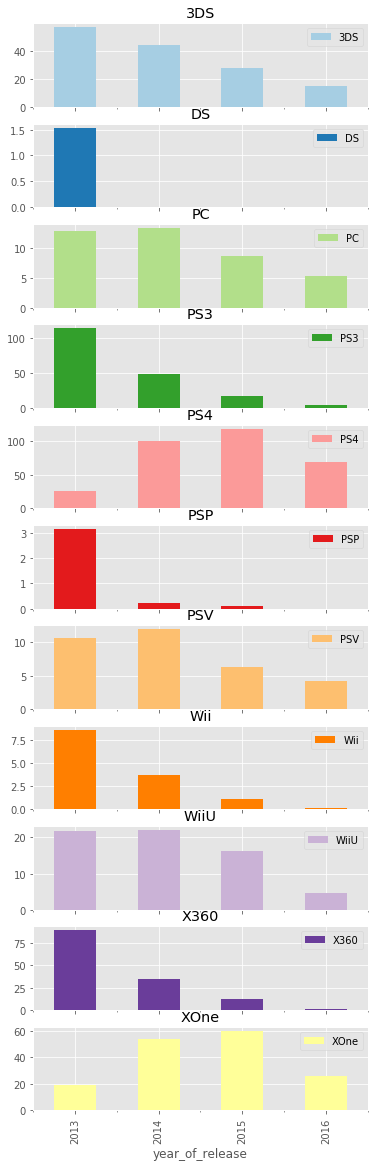

In [30]:
ActualData.pivot_table('all_sales',
                                         'year_of_release',
                                         'platform',
                                         'sum').plot(kind='bar',subplots=True,figsize=(6,20))
plt.show()

Удивительно, но все платформы показывают падение в 2016. Думаю, такое может происходить, что 2016 год представлен не полностью (это только предположение, которое, к сожалению, проверить невозможно). Тем не менее, можно увидеть, что XOne и PS4 показывали самый большой рост в своей истории. 

<a id="3.4"></a>
**(4)** Построим боксплот по глобальным продажам для всех платформ, начиная с 2013 года. Из-за того, что есть выбросы с очень большими значениями, сделал ограничение на 3. 

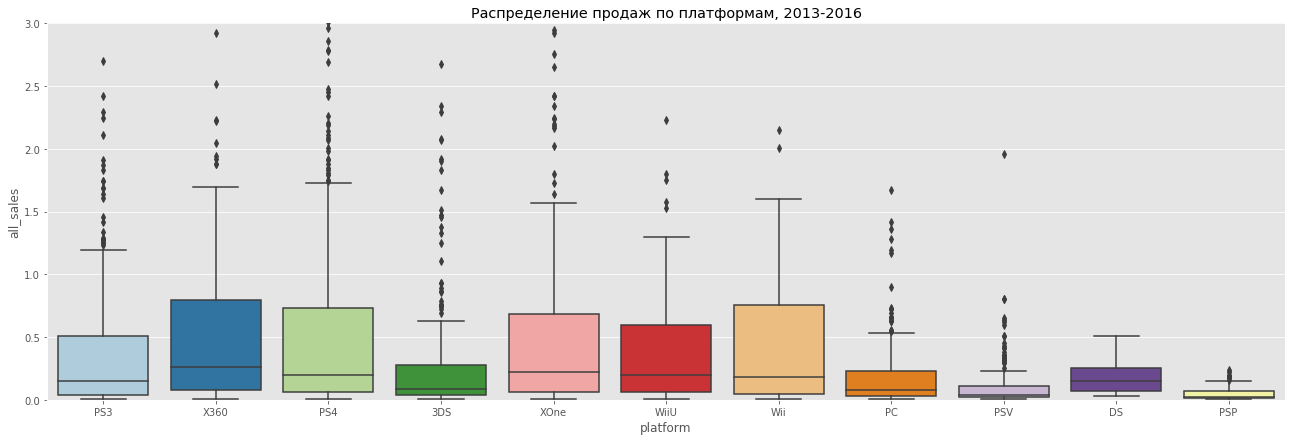

In [33]:

sns.catplot(x='platform', 
            y='all_sales', 
            kind='box', 
            data=ActualData, 
            height=6, 
            aspect=3
           )
plt.ylim(0,3)
plt.title('Распределение продаж по платформам, 2013-2016')
plt.show()

Для общей картины предлагаю построить плотности распределения, чтобы увидеть, как продажи на разных платформах вели себя за период 2013-2016. Для того чтобы можно было увидеть все продажи, я использовал логарифм, который уменьшает разброс в данных. 

Так, можно увидеть, что график посередине на уровне -2 - это 0.14млн проданных копий - медианное значение для всех платформ.Пики, чьи распределения находятся левее (PSP, PSV, 3DS, PC) продавались меньше, но это могло быть связано с тем, что их пиковый период по продажам находился до этого уровня, а в 2013-2016гг происходило угасание. Боксплот также показывает, что их медиана ниже, чем у остальных.<br>
Чьи пики находятся правее отметки -2 - это платформы X360,DS,WiiU, в данный период оказались более популярные.<br>
Платформы PS3 и PS4 оказались посередине, но их распределение более широкое, так они выпускали в продажу больше игр. <br>

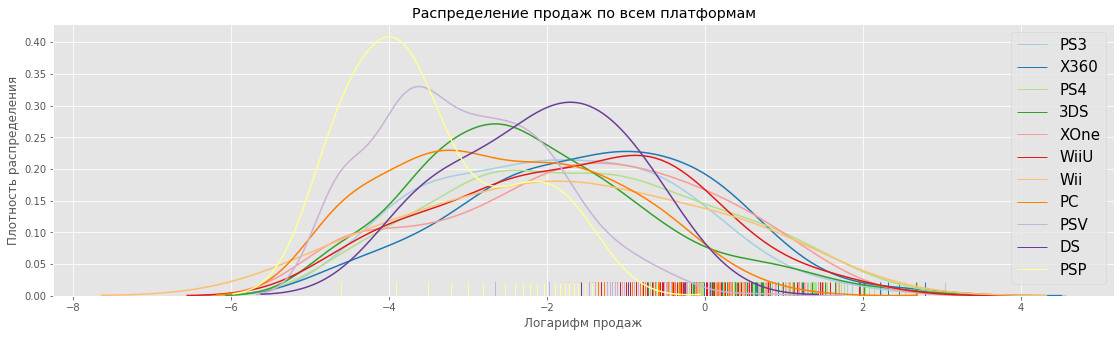

In [32]:
plt.figure(figsize=(19,5))
for i in ActualData['platform'].unique():
    sns.distplot(np.log(ActualData[ActualData['platform']==i]['all_sales']),
                 hist=False, 
                 rug=True)
plt.legend(ActualData['platform'].unique(),prop={'size':15})  
plt.xlabel('Логарифм продаж')
plt.title('Распределение продаж по всем платформам')
plt.ylabel('Плотность распределения')
plt.show()
    

<a id="3.5"></a>
**(5)** Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

Больше всего продаж в актуальный период было у PS4

In [33]:
ActualData.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False).to_frame('Количество проданных копий, млн')

,"Количество проданных копий, млн"
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.78
PSV,32.99
Wii,13.66


Посмотрим, как влияли отзывы критиков и пользователей на продажи для PS4. Для этого построим джойнтплот. 

In [34]:
def joint(x,data,name):
    g=sns.jointplot(x=x,y='all_salesLOG',data=data,kind='reg',color='green')
    g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
    g.fig.suptitle('Взаимосвязь рейтингов и продаж ({})'.format(name))
    return g.annotate(stats.pearsonr);

In [35]:
# Добавим столбец с логарифмом от продаж для уменьшения разброса
dataScores=ActualData[['user_score','critic_score','all_sales','platform']]
dataScores['all_salesLOG']=np.log(dataScores['all_sales'])

Коэффициент корелляции Пирсона 0.014 при p-value 0.8, что говорит о том, что установить какую-либо взаимосвязь между рейтингом пользователей и количества проданных копий невозможно. 

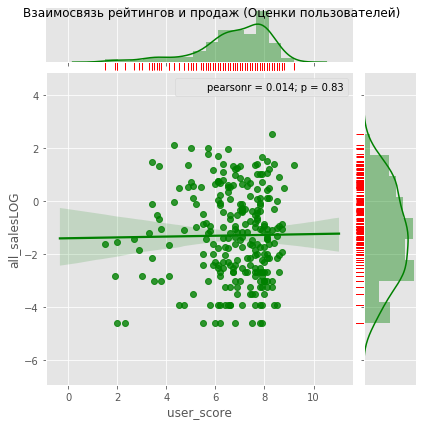

In [36]:
joint('user_score',dataScores[(dataScores.platform=='PS4')&(dataScores.user_score!=11)],'Оценки пользователей')

Взаимосвязь между количеством проданных копий и оценками профессиональных критиков более выраженная. Так, например, коэффициент корелляции равняется 0.48 при нулевом значении p-value, что может говорить о средневыраженной положительной взаимосвязи данных факторов. 

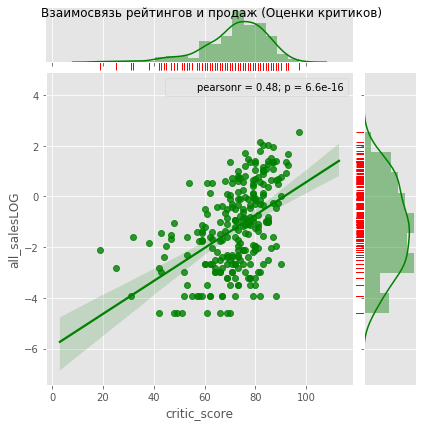

In [37]:
joint('critic_score',dataScores[(dataScores.platform=='PS4')],'Оценки критиков')

Посмотрим, как распределяются коэффициенты корелляции по другим платформам. Оценки кореляций по critic_score примерно такие же, как и для PS4, за исключением PS. 

Корелляции по оценкам пользователей незначимы, за исключением Wii и WiiU.

In [38]:
corrs=pd.DataFrame(index=dataScores.platform.unique(),
                  columns=['Sales|User_scores',
                           'LogSales|User_scores',
                          'Sales|Critic_scores',
                          'LogSales|Critic_scores'])
corrs.at['PS3','Sales|User_scores']
for i in dataScores.platform.unique():
    corrs.at[i,'Sales|User_scores']=dataScores[(dataScores.platform==i)&(dataScores.user_score!=11)][['user_score','critic_score','all_sales','all_salesLOG']].corr().at['all_sales','user_score']
    corrs.at[i,'LogSales|User_scores']=dataScores[(dataScores.platform==i)&(dataScores.user_score!=11)][['user_score','critic_score','all_sales','all_salesLOG']].corr().at['all_salesLOG','user_score']
    corrs.at[i,'Sales|Critic_scores']=dataScores[dataScores.platform==i][['user_score','critic_score','all_sales','all_salesLOG']].corr().at['all_sales','critic_score']
    corrs.at[i,'LogSales|Critic_scores']=dataScores[dataScores.platform==i][['user_score','critic_score','all_sales','all_salesLOG']].corr().at['all_salesLOG','critic_score']

corrs    

,Sales|User_scores,LogSales|User_scores,Sales|Critic_scores,LogSales|Critic_scores
PS3,0.0023944,0.0303458,0.334285,0.553048
X360,-0.0117422,0.0215582,0.350345,0.603017
PS4,-0.0319571,0.0135133,0.406568,0.479728
3DS,0.241504,0.147365,0.357057,0.422659
XOne,-0.0689251,-0.0546734,0.416998,0.475427
WiiU,0.41933,0.45584,0.376415,0.425068
Wii,0.682942,0.767026,NaN,NaN
PC,-0.090552,-0.0686013,0.19739,0.337103
PSV,0.000942472,0.018025,0.254742,0.317504
DS,NaN,NaN,NaN,NaN


Для Wii такой большой коэффициент корреляции может быть из-за маленького количества наблюдений.<br>
Это же справедливо и к PSP, у которого коэффициент кореляции равен -1 (у него всего 2 наблюдения).

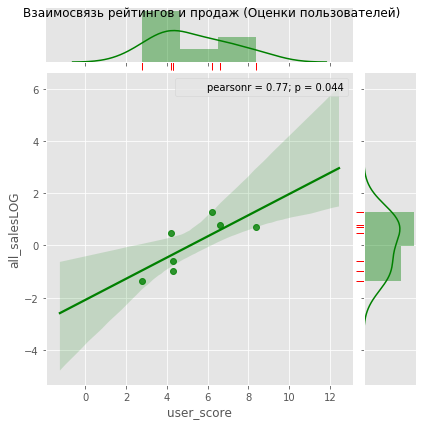

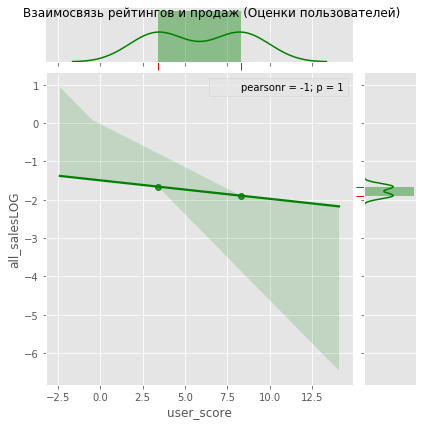

In [39]:
joint('user_score',dataScores[(dataScores.platform=='Wii')&(dataScores.user_score!=11)],'Оценки пользователей')
joint('user_score',dataScores[(dataScores.platform=='PSP')&(dataScores.user_score!=11)],'Оценки пользователей')

Таким образом, мы выявили, что на продажи не влияют оценки пользователей, а в значимой мере важны оценки профессиональных критиков.<br>
Такое может происходить по той причине, что профессиональные критики имеют больше доверия среди пользователей.

<a id="3.6"></a>
**(6)** Распределение игр по жанрам

За актуальный период наиболее популярными жанрами по количеству проданных копий оказались Action и Shooter. Но популярность Action вызвана тем, что с таким жанром выходило большее количество игр (более 700 штук), что давало потребителю попробовать разные игры (так, среднее количество проданных копий на 1 игру у жанра Action средний). Shooter - второй по популярности жанр, оказался топовым по средним показателям (больше 1 млн проданных копий на 1 игру). 

Sports и Platform также показали высокие средние значения по количеству проданных копий на 1 игру.

Наименее популярными оказались жанры Adventure, Puzzle, Strategy и Simulation. 

In [40]:
pd.concat([ActualData.groupby(by='genre')['all_sales'].sum().to_frame('Сумма проданных копий, млн'),
           ActualData.groupby(by='genre')['all_sales'].count().to_frame('Количество выпущенных игр'),
            ActualData.groupby(by='genre')['all_sales'].mean().to_frame('Среднее количество проданных копий на 1 игру, млн')],axis=1).sort_values(by='Сумма проданных копий, млн',
            ascending=False)

,"Сумма проданных копий, млн",Количество выпущенных игр,"Среднее количество проданных копий на 1 игру, млн"
genre,,,
Action,322.22,767,0.420104
Shooter,232.98,187,1.245882
Sports,150.65,214,0.703972
Role-Playing,145.89,292,0.499623
Misc,62.82,155,0.405290
Platform,42.63,74,0.576081
Racing,39.89,85,0.469294
Fighting,35.31,80,0.441375
Adventure,23.64,245,0.096490


Посмтрим на распределения по количеству проданных копий. Adventure очень сильно выделяется среди всех остальных игр (и действительно, медианные продажи на 1 игру у него очень маленькие). 

Shooters и Sports сдвинуты вправо, что говорит о том, что в этом жанре выпускают достаточно много игр, которые оказываются аномально популярными.

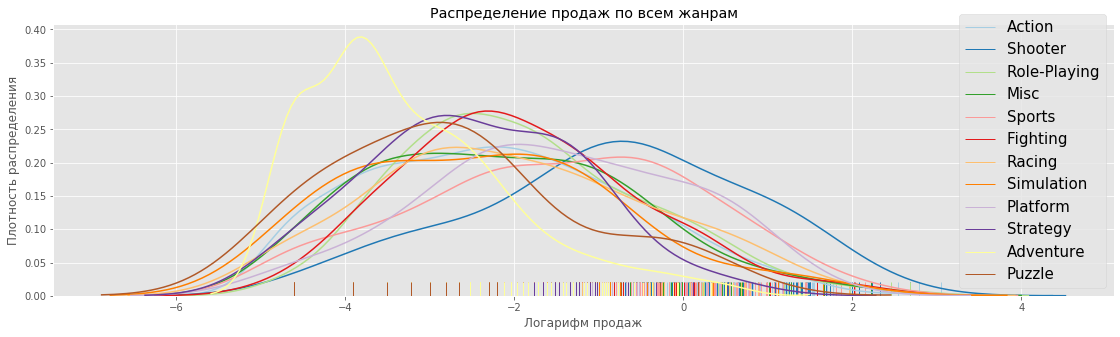

In [41]:
plt.figure(figsize=(19,5))
for i in ActualData['genre'].unique():
    sns.distplot(np.log(ActualData[ActualData['genre']==i]['all_sales']),
                 hist=False, 
                 rug=True)
plt.legend(ActualData['genre'].unique(),prop={'size':15})  
plt.xlabel('Логарифм продаж')
plt.title('Распределение продаж по всем жанрам')
plt.ylabel('Плотность распределения')
plt.show()

И если мы посмотрим топ-50 игр, то увидим, что самые популярные игры после Action остаются Shooter и Sports. 

In [42]:
ActualData.pivot_table('all_sales',
                                                       ['genre','name'],
                                                       aggfunc='sum').sort_values(by='all_sales'
                                                                                  ,ascending=False).reset_index().head(50).genre.value_counts(normalize=True)

Action          0.28
Shooter         0.24
Sports          0.20
Role-Playing    0.14
Misc            0.04
Racing          0.04
Simulation      0.02
Platform        0.02
Fighting        0.02
Name: genre, dtype: float64

### Вывод по шагу 3
1. На данном проанализировали, сколько было было создано в разные годы. Так, несмотря на то что данные представлены с 1980, основной массив данных приходится начиная с 1994-1995 года. В данном случае мы ограничили дата-сет, начиная с 1994 года. <br>
2. Выявили, что платформы в среднем живут 8 лет (данный показатель для топовых по продажам платформ составляет 10 лет, для нетоповых - 6 лет). Обычно платформы постепенно начинают расти, достигая пика на 4-6 годах жизни, далее постепенно угасают, сходя на нет. <br>
3. Также получилось выяснить, что для дальнейшего планирования достаточно ограничиться актуальным периодом, равным в 2013-2016 (всего 4 года как средний период, необходимый для роста платформы). <br> 
4. Популярными платформами в актуальный период стали X360,DS,WiiU, а самой популярной стала PS4, на примере которой мы провели анализ влияния отзывов на продажи. <br>
5. Анализ показал, что влияние отзывов пользователей не установлен, в то время как отзывы профессиональных критиков влияют положительно на продажи. <br>
6. Популярные жанры - это Action,Shooter,Sports. Непопулярные - Strategy, Adventure, Simulation, Puzzle. 

[К содержанию](#0)

<a id="4"></a>
## Шаг 4. Портрет пользователя каждого региона


###### На данном шаге анализируются платформы ([1](#4.1)), жанры ([2](#4.2)) и рейтинги ([3](#4.3)), характерные для различных регионов (Европа, Америка и Япония). 

<a id="4.1"></a>
**(1)** Самые популярные платформы (топ-5) для различных регионов

Если посмотреть суммы по платформам, то трудно сделать выводы о популярных платформах в каждом из регионов, потому что потребление игр везде разное, поэтому предлагаю посмотреть доли. 

Но тем не менее, даже по суммам можно увидеть, что, например в Японии популярен PSP и PSV и почти нет продаж по DS,PC,Wii. Также заметно отличается Япония и от X360 и XOne, по которым продажи почти отсутствуют.  

In [43]:
ActualData.pivot_table(['na_sales','eu_sales','jp_sales','other_sales'],
                                                       'platform',
                                                      aggfunc='sum')

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,30.96,67.81,38.20,6.28
DS,0.85,0.00,0.57,0.12
PC,25.61,0.00,11.17,3.00
PS3,67.81,23.35,63.50,26.77
PS4,141.09,15.96,108.74,48.35
PSP,0.17,3.29,0.00,0.04
PSV,6.10,18.59,5.04,3.26
Wii,5.93,0.05,6.56,1.12
WiiU,19.85,10.88,29.21,4.69


In [44]:
# Суммы проданных копий разные по разным регионам. Сравнивать абсолютные значения проблематично. 
ActualData[['na_sales','eu_sales','jp_sales','other_sales']].sum()

na_sales       437.77
eu_sales       392.48
jp_sales       140.78
other_sales    120.01
dtype: float64

Представленная ниже матрица отчетливо показывает популярные жанры платформы в различных регионах. Например, синим цветом показаны непопулярные совсем платформы, независимо от регионов. Среди них DS, PSP, Wii. Скорее всего они не популярны, поскольку в актуальный период уже находятся на стадии затухания. 

Выделяется 3DS у Японии, на чье потребление приходится почти 50% пользователей. В других регионах потребление 3DS не превышает больше 10%. Японию также выделяет большое потребление PSV и малое потребление PS4. 

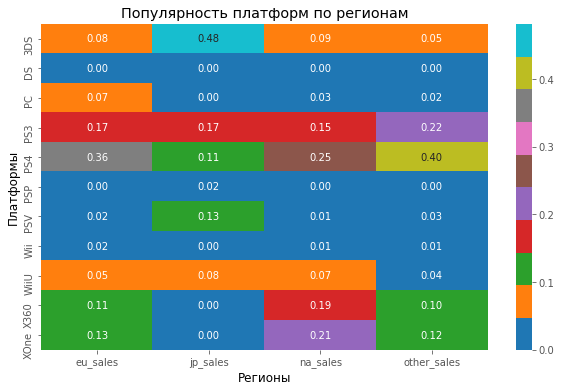

In [45]:
regionShares=(ActualData.pivot_table(['na_sales','eu_sales','jp_sales','other_sales'],
                                                       'platform',
                                                      aggfunc='sum')/ActualData[['na_sales','eu_sales','jp_sales','other_sales']].sum())
plt.figure(figsize=(10,6))
sns.heatmap(regionShares,annot=True,cmap='tab10',fmt='.2f')
plt.title('Популярность платформ по регионам')
plt.ylabel('Платформы',color='black')
plt.xlabel('Регионы',color='black')
plt.show()

PS4 в топе у всех регионов, кроме Японии. 3DS - в топе у Японии - у остальных только на пятом месте. 

In [46]:
for i in regionShares.columns:
    display(regionShares[[i]].sort_values(by=i,ascending=False).head(5))

,eu_sales
platform,
PS4,0.359483
PS3,0.172773
XOne,0.131446
X360,0.108337
3DS,0.078883


,jp_sales
platform,
3DS,0.481674
PS3,0.165862
PSV,0.132050
PS4,0.113368
WiiU,0.077284


,na_sales
platform,
PS4,0.248395
XOne,0.212714
X360,0.186536
PS3,0.145053
3DS,0.087260


,other_sales
platform,
PS4,0.402883
PS3,0.223065
XOne,0.118907
X360,0.100908
3DS,0.052329


<a id="4.2"></a>
**(2)** Самые популярные жанры (топ-5) для различных регионов

Япония отличается и в самых популярных жанрах. На матрице видно, что Япония в целом потребляет больше Role-Playing в отличие от других регионов. И существенно меньше Shooter и Sports. 

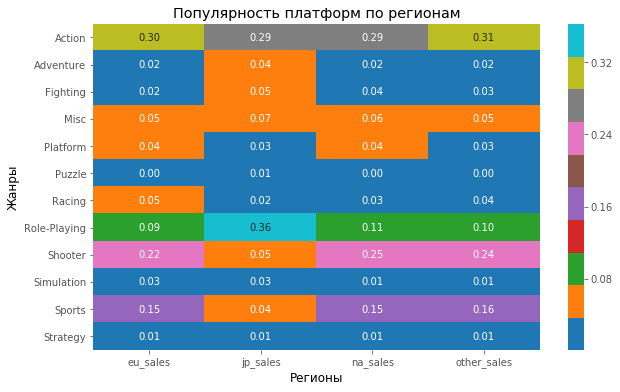

In [47]:
regionShares=(ActualData.pivot_table(['na_sales','eu_sales','jp_sales','other_sales'],
                                                       'genre',
                                                      aggfunc='sum')/ActualData[['na_sales','eu_sales','jp_sales','other_sales']].sum())
plt.figure(figsize=(10,6))
sns.heatmap(regionShares,annot=True,cmap='tab10',fmt='.2f')
plt.title('Популярность платформ по регионам')
plt.ylabel('Жанры',color='black')
plt.xlabel('Регионы',color='black')
plt.show()

Самые популярные жанры в Европе и США - это Action, Shooter и Sports.

In [48]:
for i in regionShares.columns:
    display(regionShares[[i]].sort_values(by=i,ascending=False).head(5))

,eu_sales
genre,
Action,0.301620
Shooter,0.223859
Sports,0.154199
Role-Playing,0.094196
Racing,0.051442


,jp_sales
genre,
Role-Playing,0.362551
Action,0.287612
Misc,0.065350
Fighting,0.054340
Shooter,0.046953


,na_sales
genre,
Action,0.288074
Shooter,0.250680
Sports,0.149097
Role-Playing,0.105992
Misc,0.062796


,other_sales
genre,
Action,0.310307
Shooter,0.239730
Sports,0.162070
Role-Playing,0.095659
Misc,0.050746


<a id="4.3"></a>
**(3)** Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинги ESRB:

E - от 6 лет<br>
E10+ - от 10 лет<br>
T - от 13 лет<br>
M - от 17 лет<br>

В Европе и Америке в среднем популярны игры от 17 лет, а также от 6 лет. 
В Японии же самыми популярными играми являются игры от 13 лет. Но об Японии в данном случае сложно делать выводы, потому что доля игр, по которым нет рейтинга составляет 60%. 

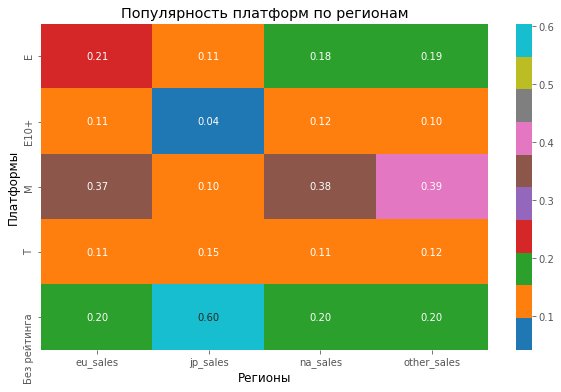

In [49]:
regionShares=(ActualData.fillna('Без рейтинга').pivot_table(['na_sales','eu_sales','jp_sales','other_sales'],
                                                       'rating',
                                                      aggfunc='sum')/ActualData.fillna('Без рейтинга')[['na_sales','eu_sales','jp_sales','other_sales']].sum())
plt.figure(figsize=(10,6))
sns.heatmap(regionShares,annot=True,cmap='tab10',fmt='.2f')
plt.title('Популярность платформ по регионам')
plt.ylabel('Платформы',color='black')
plt.xlabel('Регионы',color='black')
plt.show()

### Вывод по шагу 4
1. В данном шаге выявлено, что потребление игр в Японии существенно отличается от потребления в Америке и Европе. Так, среди платформ в Японии популярны PSV, 3DS. PS4, популярный в Америке и Европе, только на 4 месте в Японии. 
2. Также существует различие и по жанрам. В Америке и Европе популярными жанрами являются Action, Shooters, Sports, а в Японии - Role-Playing, Misc и Fighting (наряду с Action).
3. В Европе и Америке в среднем популярны игры от 17 лет, а также от 6 лет. В Японии же самыми популярными играми являются игры от 13 лет, но не стоит забывать, что по большинству игр в Японии не представлен рейтинг.

[К содержанию](#0)

<a id="5"></a>
## Шаг 5. Проверка гипотез

<a id="5.1"></a>
**(1)** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [61]:
def var(df1,df2):
    if stats.levene(df1,df2).pvalue<0.05:
        return 'Дисперсии различаются','Дисперсия дата-сета 1: {:.1f}'.format(np.var(df1)),'Дисперсия дата-сета 2: {:.1f}'.format(np.var(df2))
    else:
        'Дисперсии не различаются','Дисперсия дата-сета 1: {:.1f}'.format(np.var(df1)),'Дисперсия дата-сета 2: {:.1f}'.format(np.var(df2))

Как видно, дисперсии различаются довольно сильно (больше, чем на 1).

In [62]:
xone = data.query('year_of_release==@actualYear&platform=="XOne"&user_score!=11')['user_score']
pc = data.query('year_of_release==@actualYear&platform=="PC"&user_score!=11')['user_score']
var(xone,pc)

('Дисперсии различаются',
 'Дисперсия дата-сета 1: 1.9',
 'Дисперсия дата-сета 2: 3.0')

In [52]:
alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.17156613829336056
Не получилось отвергнуть нулевую гипотезу


p-value больше 0.05, что говорит о том, что мы не можем отвергнуть нулевую гипотезу. Это значит, что средние пользовательские рейтинги XOne и PC совпадают. Ниже представлена иллюстрация, объясняющяя это. 

100%|██████████| 1000/1000 [00:11<00:00, 83.64it/s]


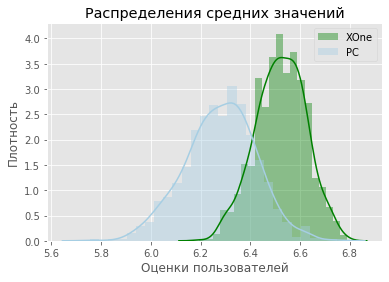

In [53]:
xone_mean = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data.query('year_of_release==@actualYear&platform=="XOne"&user_score!=11')['user_score'], 
                              size=len(data.query('year_of_release==@actualYear&platform=="XOne"&user_score!=11')['user_score']), replace=True)
    xone_mean.append(sample.mean())
    
pc_mean = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data.query('year_of_release==@actualYear&platform=="PC"&user_score!=11')['user_score'], 
                              size=len(data.query('year_of_release==@actualYear&platform=="PC"&user_score!=11')['user_score']), replace=True)
    pc_mean.append(sample.mean())

sns.distplot(xone_mean,color='green')
sns.distplot(pc_mean)

plt.legend(['XOne','PC'])
plt.title('Распределения средних значений')
plt.xlabel('Оценки пользователей')
plt.ylabel('Плотность')
plt.show()

<a id="5.2"></a>
**(2)** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные <br>
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
H1: Средние пользовательские рейтинги платформ Action и Sports различаются<br>

Дисперсии у обоих дата-сетов различаются в 2 раза. 

In [54]:
sports = data.query('year_of_release==@actualYear&genre=="Sports"&user_score!=11')['user_score']
action = data.query('year_of_release==@actualYear&genre=="Action"&user_score!=11')['user_score']
var(sports,action)

('Дисперсия дата-сета 1: 3.2', 'Дисперсия дата-сета 2: 1.8')

In [55]:
alpha = .05

results = st.ttest_ind(
    sports, 
    action, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.1834440653354691e-20
Отвергаем нулевую гипотезу


P-value очень маленький, что позволяет нам отвергнуть нулевую гипотезу и заявить, что средние пользовательские рейтинги платформ Action и Sports различаются. Ниже на изображении можно увидеть, оценки Action в среднем выше, чем оценки Sports. 

100%|██████████| 1000/1000 [00:12<00:00, 81.33it/s]


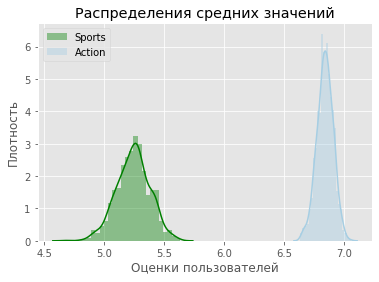

In [56]:
sports_mean = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data.query('year_of_release==@actualYear&genre=="Sports"&user_score!=11')['user_score'], 
                              size=len(data.query('year_of_release==@actualYear&genre=="Sports"&user_score!=11')['user_score']), replace=True)
    sports_mean.append(sample.mean())
    
action_mean = []
for _ in tqdm(range(1000)):
    sample = np.random.choice(data.query('year_of_release==@actualYear&genre=="Action"&user_score!=11')['user_score'], 
                              size=len(data.query('year_of_release==@actualYear&genre=="Action"&user_score!=11')['user_score']), replace=True)
    action_mean.append(sample.mean())

sns.distplot(sports_mean,color='green')
sns.distplot(action_mean)

plt.legend(['Sports','Action'])
plt.title('Распределения средних значений')
plt.xlabel('Оценки пользователей')
plt.ylabel('Плотность')
plt.show()

### Вывод по шагу 5
Исходя из проведенного статистического анализа сделали выводы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги платформ Action и Sports различаются

[К содержанию](#0)

<a id="6"></a>
## Шаг 6. Общий вывод
В большинстве своем выводы сделаны на выборке 2013-2016гг. Соответственно,
1. Наиболее популярной платформой на данном этапе являются PS4, XOne (Они показали топовый рост в 2015 году, но упали в 2016, что характерно для всех игр), но стоит иметь в виду, что данные платформы не в топе в Японии. Для японского рынка топовой платформой является 3DS. Но нужно иметь в виду, что средняя продолжительность жизни платформы составляет 8 лет, а пик проходит за 3-5 лет. Перечисленные платформы на рынке уже существуют как минимум 4 года, так что стоит ожидать, что они могут показать падение в 2017. 
2. Action - жанр, популярный во всех регионах. Но наиболее прибыльными окажутся Shooters для Европы и Америки. А для Японии нужно инвестировать в создание игр Role-Playing. Создание Strategy, Adventure, Puzzle, Simulation бессмысленно, потому что на рынке они не очень популярны. 
3. Пользовательские оценки не влияют сильно на продажи. В то время как оценки профессиональных критиков показали умеренную взаимосвязь с количеством проданных копий. 

In [57]:
print('Код проходит полностью за', datetime.datetime.now()-starttime)

Код проходит полностью за 0:01:19.201554
